# 🏠 Predicción del Precio de Casas en Ames, Iowa

## 📌 Introducción

El mercado inmobiliario es una de las inversiones más importantes en la vida de una persona. Comprender qué factores determinan el precio de una vivienda no solo es útil para compradores o vendedores, sino también para desarrolladores, analistas del sector y responsables de políticas públicas. 

El proyecto utiliza el dataset **Ames Housing**, que contiene información detallada sobre 2.930 propiedades vendidas entre 2006 y 2010 en Ames, Iowa (EE. UU.). Este conjunto de datos incluye variables físicas (tamaño, habitaciones, materiales), de entorno (barrio, calidad del vecindario) y características estructurales y estéticas que pueden impactar en el precio final de venta.

[Ver dataset en Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

## 🎯 Objetivo del proyecto

El objetivo principal es **identificar los factores más influyentes en el precio de una vivienda** y construir un modelo exploratorio que permita entender cómo estos elementos se relacionan entre sí. Se busca responder preguntas clave para aportar valor tanto al mercado como al análisis de datos aplicado.
Además, se busca un modelo predictivo optimo de **Machine Learning** que pueda estimar con predicción de la variable **SalePriece** y así aportar valor en el análisis del mercado. 

## 💡 Motivación

Determinar correctamente el valor de una propiedad puede representar la diferencia entre una buena o mala inversión. Este análisis busca responder interrogantes relevantes para diversos actores:

- **Compradores y vendedores**: comprender qué aumenta o reduce el valor de una casa.
- **Agentes inmobiliarios**: mejorar su asesoramiento con información basada en datos.

## ❓ Preguntas 

1. ¿Qué características físicas tienen mayor correlación con el precio?
2. ¿Cómo afecta la ubicación, barrio, al valor de la propiedad?
3. ¿Las casas más antiguas tienden a venderse a menor precio, o influye más su estado de conservación?

## 🧰 Herramientas y enfoque

El análisis se realizará con Python y las bibliotecas pandas, seaborn, matplotlib, numpy, scikit-learn y xgboost. Se aplicarán técnicas exploratorias, visualizaciones de correlación, modelos de regresión lineal múltiple para evaluar relaciones entre variables, Random Forest, modelado avanzado y mejora del rendimiento predictivo.

## 📥 Carga de Datos

In [40]:
# Librerias

#drive
#from google.colab import drive
#import os
#drive.mount('/content/gdrive')

#manipulasion y visualizacion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprosesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

#optimizacion
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor

#evaluar
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
# Cargar el archivo CSV

#drive
#%cd '/content/gdrive/MyDrive/Data Science ll/Data'
#df = pd.read_csv('train.csv', sep=',')

#local
df = pd.read_csv('Data/train.csv', sep=',')

In [42]:
df.head()#primeras 5 filas de csv

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
df.info()#informacion basica de cada fila

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
df.describe().T #descripcion detalladas de variables numericas

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


El dataset consta de 81 columnas y 1460 filas, donde cada una de las filas representa una casa vendida y cada columna representa las características de esa casa, salvo por la columna ID acá no tiene relevancia.

## 🧹 Nulos y limpieza

In [45]:
#elimino columna inecesaria
df = df.drop('Id', axis=1)

In [46]:
# porcentaje de valores nulos por columna en orden descendente
null_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
null_percent[null_percent > 0]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

Como variable con mayor cantidad de nuelos esta **PoolQC** con un **99.5% nulos**, lo que significaría que la mayoría de las propiedades no tienen piscina.

In [47]:
# reemplazo los NA por None, variables categoricas
categorical_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                    'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                    'BsmtFinType1', 'BsmtFinType2']

df[categorical_none] = df[categorical_none].fillna('None')

#variables numericas

df['LotFrontage'] = df['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt']) #si no hay garaje, usar año de construccion de la casa
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [48]:
# verifico que no queden nulos
assert df.isnull().sum().sum() == 0, "¡Aún hay valores nulos!"

## 📊 Análisis Exploratorio de Datos (EDA)


### ❓ ¿Qué características físicas tienen mayor correlación con el precio?

 Para contestar esta pregunta voy a usar las siguientes columnas:
* **GrLivArea:** Área habitable sobre nivel del suelo.

* **TotalBsmtsF:** Área total del sótano.

* **BedroomAbvGr:** Número de habitaciones.

* **FullBath:** Número de baños completos.

* **SalePrice:** Precio de venta.


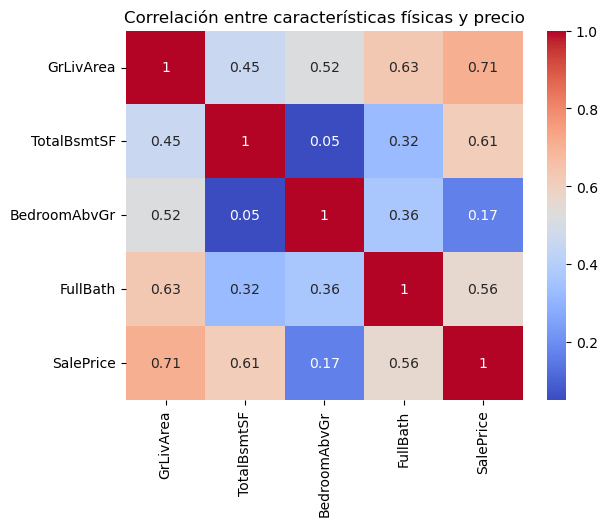

In [49]:
corr_matrix = df[['GrLivArea', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath', 'SalePrice']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlación entre características físicas y precio")
plt.show()

El resultado del grafico muestra una fuerte correlación mayor en el precio de venta entre **área habitable** y **área de sótano**, mientras que el **número de habitaciones** no influye mucho en el precio, solo una correlacion de 0.17.
Por lo tanto, el área habitable parece ser el predictor físico más fuerte del precio.

Para ver más clara la relación entre **área habitable** y **precio**.

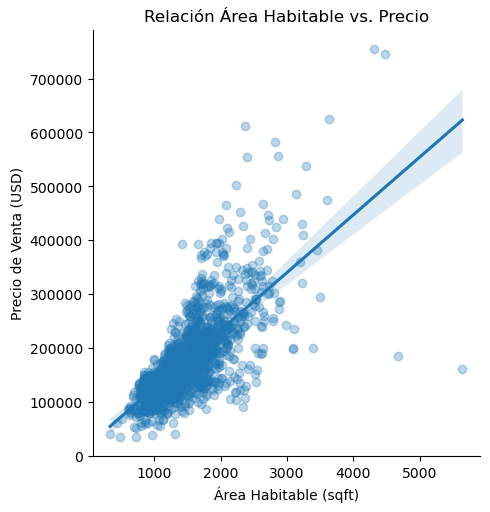

In [50]:
# graficos de dispersion con linea
sns.lmplot(data=df, x='GrLivArea', y='SalePrice', scatter_kws={'alpha':0.3})
plt.title("Relación Área Habitable vs. Precio")
plt.xlabel("Área Habitable (sqft)", fontsize=10)#square feet (pies cuadrados)
plt.ylabel("Precio de Venta (USD)", fontsize=10)
plt.show()

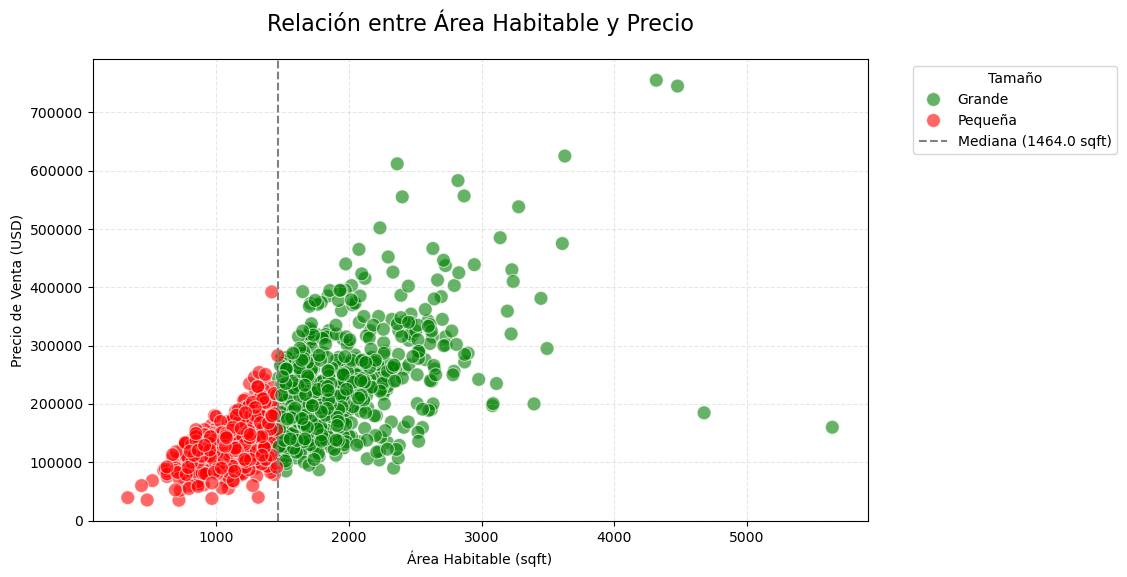

In [51]:
# separo casas grandes y pequeñas
median_area = df['GrLivArea'].median()
df['Size_Category'] = df['GrLivArea'].apply(lambda x: 'Grande' if x > median_area else 'Pequeña')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='GrLivArea',
    y='SalePrice',
    hue='Size_Category',
    palette={'Grande': 'green', 'Pequeña': 'red'},
    alpha=0.6,
    s=100  # Tamaño de los puntos
)

plt.title("Relación entre Área Habitable y Precio", fontsize=16, pad=20)
plt.xlabel("Área Habitable (sqft)", fontsize=10)
plt.ylabel("Precio de Venta (USD)", fontsize=10)
plt.axvline(median_area, color='gray', linestyle='--', label=f'Mediana ({median_area} sqft)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title="Tamaño", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### ❓ ¿Cómo afecta la ubicación, barrio, al valor de la propiedad?

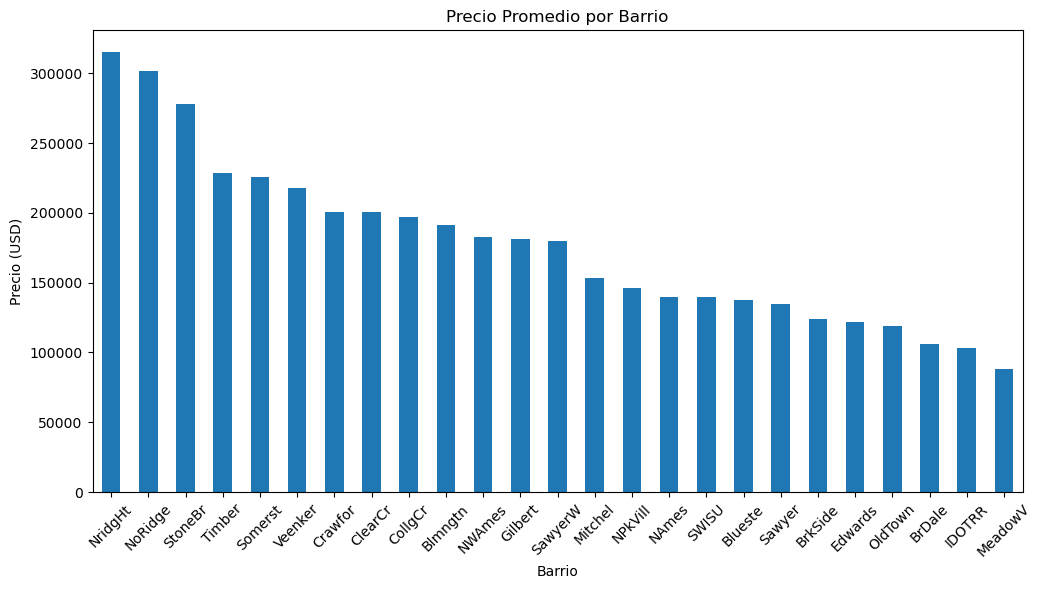

In [52]:
# precio promedio por barrio, ordenado
df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Precio Promedio por Barrio")
plt.ylabel("Precio (USD)")
plt.xlabel("Barrio")
plt.xticks(rotation=45)
plt.show()

La mediana del precio de las propiedades varía considerablemente según el barrio. **NoRidge**, **NridgHt**, **StoneBr** son los más caros **300.000 USD**, mientras que **BrDale**, **IDOTRR**, **MeadowV** son los más baratos **100.000 USD**. Mostrando así una diferencia del 200% los precios de las casas entre barrios.

Uso un gráfico de boxplot. para ver mejor la variabilidad, distribución, rangos, media, simetría y outliers.

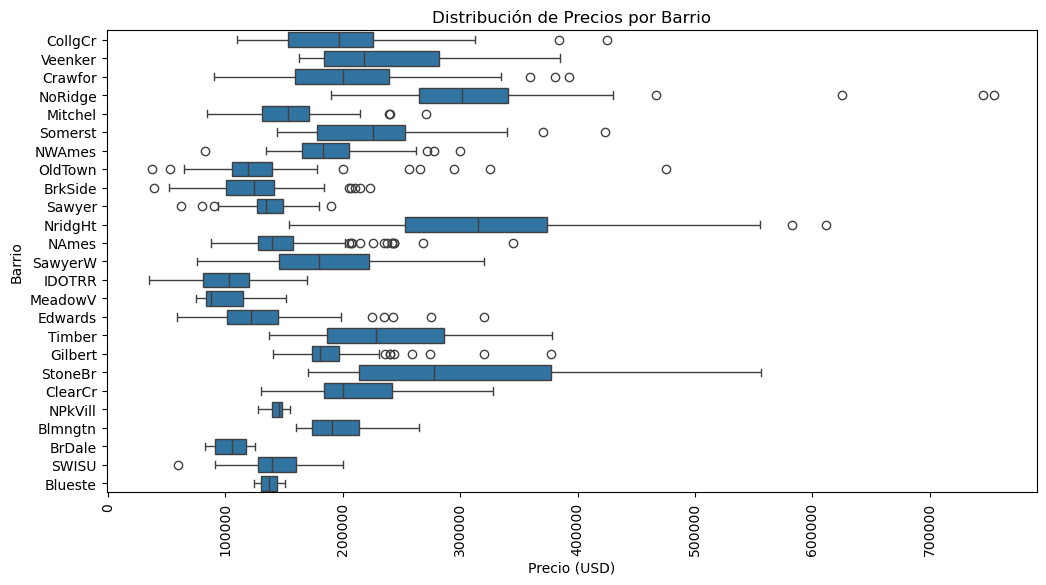

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='Neighborhood', x='SalePrice')
plt.xticks(rotation=90)
plt.title("Distribución de Precios por Barrio")
plt.xlabel("Precio (USD)")
plt.ylabel("Barrio")
plt.show()

Con esto podemos ver que **NridgHt** tiene un precio promedio mayor a **NoRidge**, quien era el que mayor precio tenía en el grafico de barras, pero gracias a este se puede ver que cuenta con varios outliners.

En resumen, la ubicación influye fuertemente en el valor de las viviendas, no solo por el promedio sino también por la dispersión y presencia de propiedades fuera de lo común.

### ❓ ¿Las casas más antiguas tienden a venderse a menor precio, o influye más su estado de conservación?


Para este grafico voy a usar:
* **YearBuilt**: Año de construcción de la propiedad.

* **SalePrice**: Precio de venta.

* **OverallCond**: Condición general de la propiedad (escala de 1 a 9, donde 1 = "Muy pobre" y 9 = "Excelente").

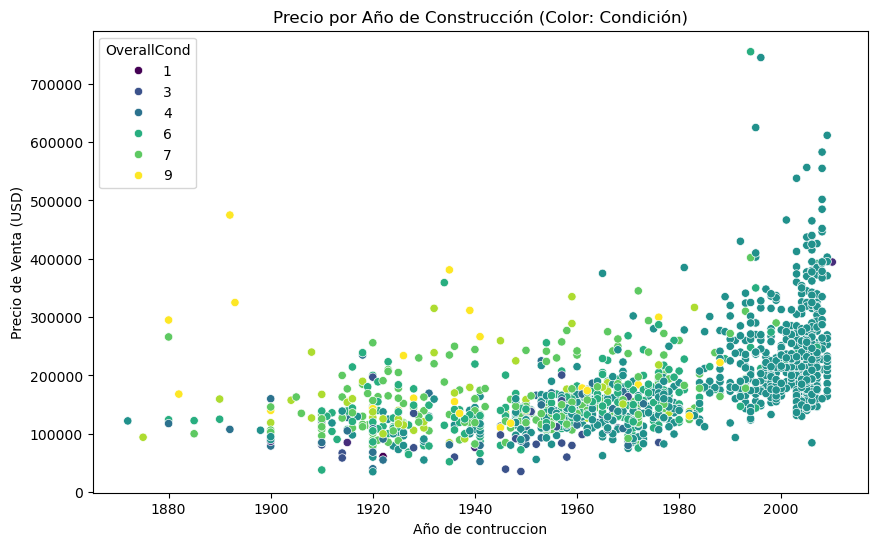

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice', hue='OverallCond', palette='viridis')
plt.title("Precio por Año de Construcción (Color: Condición)")
plt.xlabel("Año de contruccion", fontsize=10)
plt.ylabel("Precio de Venta (USD)", fontsize=10)
plt.show()

Este gráfico muestra cómo varía el precio de las viviendas según su año de construcción.
* Casas de **1800** a **1980** se puede ver como las casas se mantienen en un rango estable de precios bajos, salvo algunos outliners.
* Las casas de **1980** a **2010** ya incrementa su precio y la mayoría son de buena calidad. 
* Se puede ver casa en buen estado baratas de fecha de construcción **1910** a **1970**.

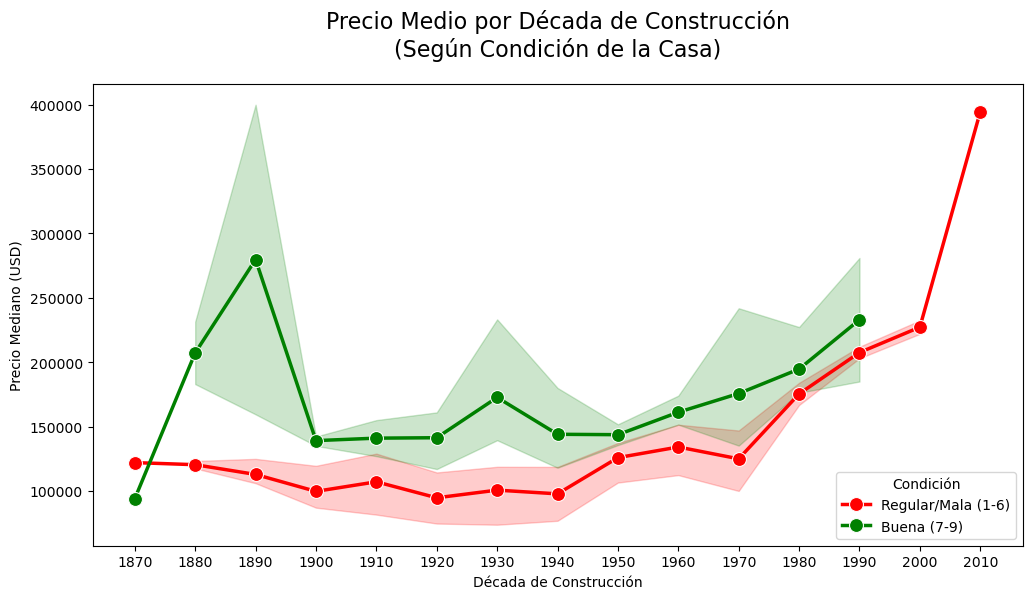

In [55]:
#decada
df['Decade'] = (df['YearBuilt'] // 10) * 10  # 1983 a 1980
df_decade = df.groupby(['Decade', 'OverallCond']).agg({'SalePrice': 'median'}).reset_index() #calculo mediana para evitar outliers

# filtro condiciones
df_decade['Condition'] = df_decade['OverallCond'].apply(lambda x: 'Buena (7-9)' if x >= 7 else 'Regular/Mala (1-6)')

# grafico de lineas
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_decade,
    x='Decade',
    y='SalePrice',
    hue='Condition',
    palette={'Buena (7-9)': 'green', 'Regular/Mala (1-6)': 'red'},
    marker='o',
    linewidth=2.5,
    markersize=10
)
plt.title("Precio Medio por Década de Construcción\n(Según Condición de la Casa)", fontsize=16, pad=20)
plt.xlabel("Década de Construcción", fontsize=10)
plt.ylabel("Precio Mediano (USD)", fontsize=10)
plt.xticks(df_decade['Decade'].unique())
plt.legend(title="Condición")

plt.show()

Se puede observar que:

* Las viviendas construidas entre **1990** y **2010** tienen los precios más altos, independientemente de su condición.

* Las casas anteriores a **1980** muestran precios inferiores, pero si están bien mantenidas (condición 7 a 9), logran alcanzar valores competitivos.

Esto sugiere que el **año de construcción** y la **condición** están fuertemente relacionados, pero no son equivalentes. El mantenimiento adecuado puede extender la vida útil comercial de una propiedad.

## 🧠 Ingeniería de Atributos

Identifico variables que podrían ser útiles para predecir el precio (SalePrice), basandome en el análisis exploratorio y la correlacion con esta, solo de variables numericas

In [56]:
corr = df.corr(numeric_only=True)#solo variable numericas
corr['SalePrice'].sort_values(ascending=False).head(15)#15 mas correlacionadas con saleprice

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Decade          0.515824
GarageYrBlt     0.508043
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
Name: SalePrice, dtype: float64

Tomo alguna de estas: 

* **OverallQual**: calidad general (0.79)

* **GrLivArea**: metros cuadrados habitables sobre suelo (0.70)

* **GarageCars**: capacidad del garage (0.64)

* **TotalBsmtSF**: tamaño del sótano (0.61)

* **YearBuilt**: año de construcción (0.50)

* **FullBath, HalfBath**: baños (0.56)

* **TotRmsAbvGrd**: cantidad total de habitaciones (0.53)

In [57]:
#creo nuevas variables

# antiguedad de la casa al momento de la venta
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# cantidad total de baños (completos + medios * 0.5)
df['TotalBathrooms'] = df['FullBath'] + df['HalfBath'] * 0.5

# superficie total combinando areas habitables y sotano
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']

# indicador  si la casa se vendio cuando se construyo
df['IsNew'] = (df['YearBuilt'] == df['YrSold']).astype(int)


Converti las variables categóricas en variables numéricas. Use Label Encoding para ordinales y One-Hot Encoding para nominales

In [58]:
# encoding ordinal 
qual_cols = ['KitchenQual', 'BsmtQual']
label_enc = LabelEncoder()
for col in qual_cols:
    df[col] = df[col].fillna('None')  # evita errores por nulos
    df[col] = label_enc.fit_transform(df[col])

# encoding nominal 
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)


* **BsmtQual**: calidad del sótano

* **KitchenQual**: calidad de la cocina

* **Neighborhood**: barrio

Para la regresión lineal, aplique StandardScaler

In [59]:
# columnas a escalar
cols_to_scale = ['GrLivArea', 'TotalBsmtSF', 'HouseAge', 'TotalBathrooms', 'TotalArea']

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

Preparo la matriz X y la variable objetivo y

In [60]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
        'YearBuilt', 'HouseAge', 'TotalBathrooms', 'TotalArea', 'IsNew',
        'KitchenQual', 'BsmtQual'] 
        + 
        #agrego todas las columnas que comiencen con esa palabra
        [col for col in df.columns if col.startswith('Neighborhood_')]]#por el one-hot encoding previo

y = df['SalePrice']


##  💪 Entrenamiento

Divido los datos en entrenamiento y testeo para validar la capacidad del modelo.

In [61]:
# division 80, 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 📘 Regresion Lineal

In [62]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

LinearRegression()

### 🌲 Random Forest Regressor

In [63]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### ⚙️ XGBoost

In [64]:
modelo_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

## 🤓 Evaluación

In [65]:
#modularizacion para motrar resultados
def evaluar_modelo(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred) 
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"📉 MAE:  {mae:.2f}")
    print(f"📈 RMSE: {rmse:.2f}")
    print(f"🔎 R²:   {r2:.4f}")
    print()

Metricas para evaluar:

* **MAE** (Mean Absolute Error)

* **RMSE** (Root Mean Squared Error)

* **R²** (Coeficiente de determinación)

In [66]:
#resultados
y_pred_lr = modelo_lr.predict(X_test)
print("🔵 Modelo de Regresión Lineal")
evaluar_modelo(y_test, y_pred_lr)

y_pred_rf = modelo_rf.predict(X_test)
print("🟢 Modelo Random Forest")
evaluar_modelo(y_test, y_pred_rf)

y_pred_xgb = modelo_xgb.predict(X_test)
print("🔘 Modelo XGBoost")
evaluar_modelo(y_test, y_pred_xgb)


🔵 Modelo de Regresión Lineal
📉 MAE:  22153.15
📈 RMSE: 35557.34
🔎 R²:   0.8352

🟢 Modelo Random Forest
📉 MAE:  18156.87
📈 RMSE: 27839.71
🔎 R²:   0.8990

🔘 Modelo XGBoost
📉 MAE:  17894.12
📈 RMSE: 27340.36
🔎 R²:   0.9025



* **XGBoost** fue el mejor modelo, con los el menores errores de **MAE** y **RMSE** y el mayor **R²**. 

* **Random Forest** obtuvo métricas similares, siendo una alternativa aunque ligeramente inferior.

* **Regresión lineal** tuvo un rendimiento menor, dfemostrando que las relaciones no son puramente lineales ya que los modelos no lineales reflejan mejor la complejidad del mercado inmobiliario.

Con los resultados hago un DataFrame y los presento en formato de una tabla con los valores con un formato fácil de interpretar, ordenados según su RMSE de forma ascendente.

In [67]:
#dataFrame de resultados
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'XGBoost'],
    'MAE': [mean_absolute_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_xgb)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test, y_pred_xgb))],
    'R²': [r2_score(y_test, y_pred_lr),
           r2_score(y_test, y_pred_rf),
           r2_score(y_test, y_pred_xgb)]
})

# formato en miles
resultados['MAE'] = resultados['MAE'].apply(lambda x: f"{x/1000:,.3f} USD")
resultados['RMSE'] = resultados['RMSE'].apply(lambda x: f"{x/1000:,.3f} USD")
resultados['R²'] = resultados['R²'].apply(lambda x: f"{x*100:.2f}%")

resultados.sort_values(by='RMSE', ascending=True)


,Modelo,MAE,RMSE,R²
2,XGBoost,17.894 USD,27.340 USD,90.25%
1,Random Forest,18.157 USD,27.840 USD,89.90%
0,Regresión Lineal,22.153 USD,35.557 USD,83.52%


**XGBoot** por su **MAE** se equivoca en promedio por **17.894 USD** al estimar el precio, su **MRSE** indica que el promedio del error se desvía por **27.340 USD** y el **R²** de **90.25%** implica que el modelo explica la variabilidad del precio. 

## 🔧 Optimización de Hiperparámetros

### 🌲 Random Forest + GridSearchCV

In [68]:
# modelo base
rf = RandomForestRegressor(random_state=42)

# hiperparametro
param_grid_rf = {
    'n_estimators': [100, 200],#n arboles por bosque
    'max_depth': [10, 20, None],#profundidad
    'min_samples_split': [2, 5],#divisiones
    'min_samples_leaf': [1, 2],#hojas
}

# configuracion del GridSearchCV
grid_rf = GridSearchCV(estimator=rf, #modelo 
                       param_grid=param_grid_rf, #diccionario
                       cv=5, #particiones
                       scoring='neg_root_mean_squared_error', #metrica
                       n_jobs=-1, #todos los nucleos
                       verbose=1)#mostrar en cosola

# ajuste
grid_rf.fit(X_train, y_train)

# mejores parametros
print("Mejores parámetros:", grid_rf.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### ⚙️ XGBoost + RandomizedSearchCV

In [69]:
# modelo 
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# hiperparametros
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],#contribucion
    'subsample': [0.6, 0.8, 1.0], #proporcion datos
    'colsample_bytree': [0.6, 0.8, 1.0], #proporcion columnas
}

# bussqueda
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist_xgb,
                                       n_iter=30, cv=5, scoring='neg_root_mean_squared_error',
                                       random_state=42, n_jobs=-1, verbose=1)

# ajuste
random_search_xgb.fit(X_train, y_train)

# mejores parametros
print("Mejores parámetros:", random_search_xgb.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores parámetros: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


Usando los hiperparámetros optimizados ahora vuelvo a entrenar y evaluar para luego comparar resultados con los resultados previos a la optimización.

### 🎯 Entrenamiento y Evaluacion Optimizada

In [70]:
# Random Forest optimizado
rf_best = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf_best.fit(X_train, y_train)
y_pred_rf_best = rf_best.predict(X_test)

# XGBoost optimizado
xgb_best = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.6,
    colsample_bytree=0.6,
    random_state=42
)
xgb_best.fit(X_train, y_train)
y_pred_xgb_best = xgb_best.predict(X_test)

In [71]:
#evaluacion
print("🟢 Modelo Random Forest (Opt.)")
evaluar_modelo(y_test, y_pred_rf_best)

print("🔘 Modelo XGBoost (Opt.)")
evaluar_modelo(y_test, y_pred_xgb_best)

🟢 Modelo Random Forest (Opt.)
📉 MAE:  18211.86
📈 RMSE: 28689.55
🔎 R²:   0.8927

🔘 Modelo XGBoost (Opt.)
📉 MAE:  17685.55
📈 RMSE: 27155.54
🔎 R²:   0.9039



* **Random Forest** empeoró ligeramente luego de la optimización.

* **XGBoost**, en cambio, mejoró en todas las métricas, con una reducción tanto en el **MAE** como en el **RMSE** y un leve incremento en el **R²**.

## 🧾 Conclusión Final

Identifique factores influyentes en el precio de una vivienda, los hallazgos principales fueron:

* El **área habitable*** es uno de los factores más determinantes en el precio final.

* La ubicación, especialmente el **barrio**, genera una diferencia de hasta un **200%** entre zonas más y menos valorizadas.

* El **estado de la propiedad** puede compensar la **antigüedad**, casas antiguas bien mantenidas alcanzan precios similares a construcciones modernas.

La combinación de buena **condición**, **ubicación** y **tamaño** da como resultados precios significativamente más altos.

Estos descubrimientos aportan valor a:

* **Compradores** y **vendedores** pueden usar esta información para entender mejor qué características justifican el valor de una vivienda.

* **Agentes inmobiliarios** pueden mejorar su asesoramiento utilizando estos insights para orientar decisiones de compra, venta.

Además, se entrenaron y compararon modelos de Machine Learning para predecir precios de manera más precisa. Entre ellos, el modelo **XGBoost** y al optimizalo ofreció el mejor rendimiento, con un **MAE** de **17.685 USD**, un **RMSE** de **27.155 USD** y un **R²** de **0,9039**, superando levemente a otros modelos como **Random Forest** y **Regresión Lineal**.

Este trabajo demuestra cómo el análisis de datos aplicado al sector inmobiliario puede reducir la incertidumbre, mejorar la toma de decisiones y generar valor real a partir de los datos.